In [1]:
from yamlscript_histdata import histdata_parser
import mplhep as hep
import matplotlib.pyplot as plt
import pandas as pd
import boost_histogram as bh
import numpy as np

In [2]:
df1, df2 = histdata_parser("CR_ttc_prefit.yaml")

histdata_parser ran in 30 ms.


In [3]:
values = df1.loc[['Samples'],'Yield'][2]
edges = df2.loc[['BinEdges'],0][0]

centres = 0.5*(np.array(edges[1:]) + np.array(edges[:-1]))

hist_list = df1.loc[['Samples'],'Yield'].tolist()

In [4]:
histogram = bh.Histogram(bh.axis.Variable(edges))
histogram.fill(centres, weight=values)
# len(histogram.axes)
# hep.histplot(histogram)

# obj = Histo1D(histogram, "name1", htype="fill")
# obj.display()

Histogram(Variable([0, 0.2596, 0.2928, 0.3119, 0.328, 0.3417, 0.3554, 0.37, 0.3872, 0.412, 1]), storage=Double()) # Sum: 13085.293808531815

In [7]:
class EmptyPlot():
    
    def __init__(self, title=None, layout=(1,1), size=(6.4,4.8)):
        
        self.title = title
        self.layout = layout
        self.size = size
        
        self.container1d = []
        self.container2d = []

    def create_canvas(self):
        self.fig, self.axs = plt.subplots(self.layout[0], self.layout[1], figsize=self.size)


class PythHist1(EmptyPlot):
    
    def __init__(self, title=None, layout=(1,1), size=(6.4,4.8)):
        
        super().__init__(title, layout, size)
        self.create_canvas()
        
    def fill(self, obj, stacked=False):
        self.container1d.append(obj)
        self.stacked = stacked
    
    def display(self):
        hep.histplot(self.container1d[0], ax=self.axs, stack=self.stacked) # in this case axs has only one value
        self.axs.set_title(self.title)


class PythRatio(EmptyPlot):
                 
    def __init__(self, figtitle=None, titletop=None, titlebot=None, layout=(2,1), size=(4,6)):
        
        super().__init__(figtitle, layout, size)
        self.create_canvas()
        self.upper = self.axs[0]
        self.lower = self.axs[1]
        self.h1 = EmptyPlot(titletop, size=(2,2))
        self.h2 = EmptyPlot(titlebot, size=(2,2))
        
    def fill(self, obj):
        self.h1.container1d.append(obj)
        self.h2.container1d.append(obj)
        
    def display(self):
        hep.histplot(self.h1.container1d[0], ax=self.upper)
        hep.histplot(self.h2.container1d[0], ax=self.lower)
        self.upper.set_title(self.h1.title)
        self.lower.set_title(self.h2.title)
        self.fig.suptitle(self.title)

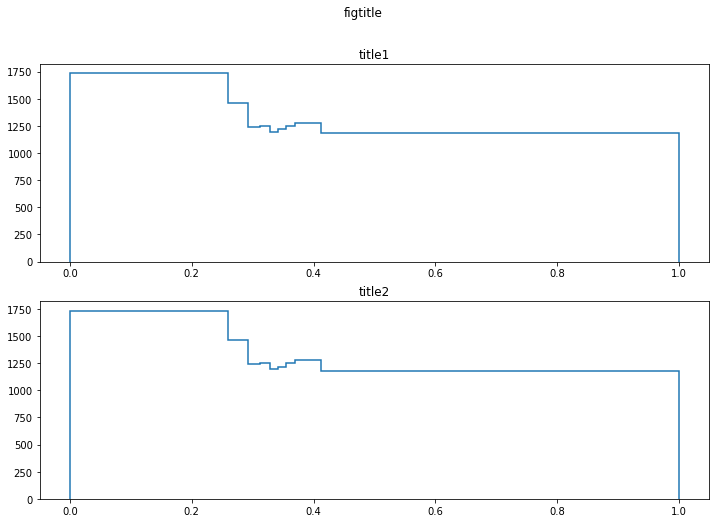

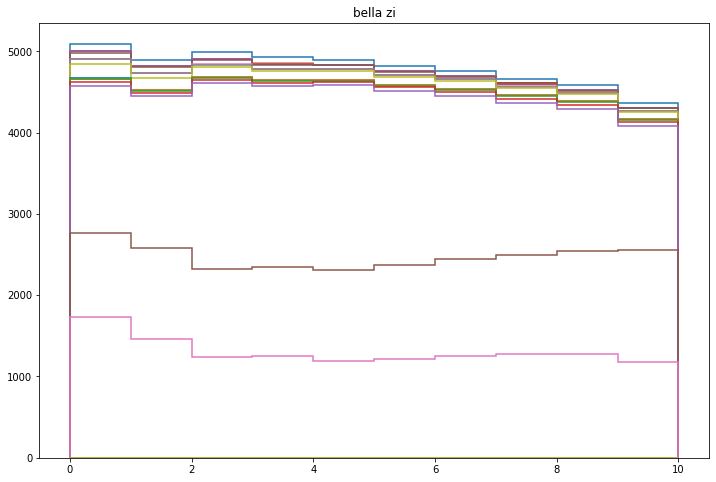

In [8]:
obj1 = PythRatio("figtitle", "title1", "title2", size=(12,8))
obj1.fill(histogram)
obj1.display()

obj2 = PythHist1("bella zi", size=(12,8))
obj2.fill(hist_list, stacked=True)
obj2.display()